Set-up

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [31]:
os.getcwd()
#working directory should be /Code/CodeFigure6

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure6'

Plotting the frequency of lysotracker band on the Fas3 border in 1 vs 6 week ;10930;>;Atg8a-mCherry-GFP;

Note: You will need to run the StatsLysotrackerAtg8a.Rmd file first, or annotate out the stats code

In [75]:
csv_path = "../../Data/DataFigure6/Atg8amChGfpLysoFas3CtrlvExp_n.csv"
df = pd.read_csv(csv_path)

In [76]:
df['PerLysoFas3'] = df['LysoFas3_CtrlvExp'] *100

df['Genotype'] = df['Genotype'].replace({
    'Control': '6wk_Control',
    'Exp': '6wk_Exp'
})

df.head()

,Weeks,Genotype,LysoFas3_CtrlvExp,n,N,PerLysoFas3
0,6,6wk_Control,0.3000,10,1,30.00
1,6,6wk_Exp,0.5714,7,1,57.14
2,6,6wk_Control,0.4762,21,2,47.62
3,6,6wk_Exp,0.2250,40,2,22.50
4,6,6wk_Control,0.4500,20,3,45.00


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_17231/3771354088.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_17231/3771354088.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


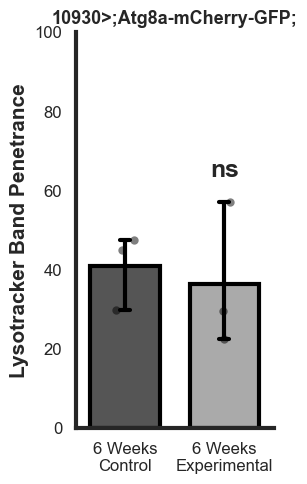

In [78]:
stats_path = "../../Results/ResultsFigure6/StatsLysoFas3CtrlvExpAtg8attest.csv"
stats = pd.read_csv(stats_path)

df["Genotype"] = df["Genotype"].astype(str)
genotype_order = ["6wk_Control", "6wk_Exp"]

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

# Barplot
sns.barplot(
    data=df,
    x="Genotype",
    y="PerLysoFas3",
    order=genotype_order,
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=df,
    x="Genotype",
    y="PerLysoFas3",
    order=genotype_order,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

# Get maximum y-value for each bar to position the star
y_max = df.groupby("Genotype")["PerLysoFas3"].max()
offset = 5

# Add the star directly above the Exp bar
star = stats.loc[0, "stars"]  # assumes single row for Control vs Exp
x_pos = genotype_order.index("6wk_Exp")
y_pos = y_max["6wk_Exp"] + offset

ax.text(
    x=x_pos,
    y=y_pos,
    s=star,
    ha="center",
    va="bottom",
    fontsize=30 if star != "ns" else 18,
    fontweight="bold"
)

# Axes formatting
plt.ylim(0, 100)
plt.ylabel("Lysotracker Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")
ax.set_xticklabels([
    "6 Weeks\nControl",
    "6 Weeks\nExperimental"
])
plt.title('10930>;Atg8a-mCherry-GFP;', fontsize=13, weight='bold')

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save figure
results_directory = '../../Results'
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, 'ResultsFigure6', 'LysoFas3CtrlvExpAtg8amChGfp.pdf')
plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()


Plotting the frequency of lysotracker band on the Fas3 border in 6 week in no phenotype vs phenotype

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [35]:
csv_path = "../../Data/DataFigure6/Atg8amChGfpLysoFas3CtrlExpNovsPheno_n.csv"
df = pd.read_csv(csv_path)

In [36]:
df['PerLysoByPheno'] = df['LysoFas3CtrlvsExpbyPheno'] * 100

df['Phenotype'] = df['Phenotype'].map({0: 'No Phenotype', 1: 'Phenotype'})

df['Genotype'] = df['Genotype'].replace({
    'Control': '6wk_Control',
    'Exp': '6wk_Exp'
})

df['Group'] = df['Genotype'] + "_" + df['Phenotype']

df['Group'] = pd.Categorical(df['Group'], categories=[
    "6wk_Control_Phenotype",
    "6wk_Control_No Phenotype",
    "6wk_Exp_Phenotype",
    "6wk_Exp_No Phenotype"
], ordered=True)

unique_groups = df['Group'].cat.categories if hasattr(df['Group'], 'cat') else df['Group'].unique()
group_to_genotype = {g: g.split("_")[0] for g in unique_groups}

df.head(10)

,Weeks,Genotype,Phenotype,LysoFas3CtrlvsExpbyPheno,n,N,PerLysoByPheno,Group
0,6,6wk_Control,Phenotype,0.1667,6,1,16.67,6wk_Control_Phenotype
1,6,6wk_Control,No Phenotype,0.5000,4,1,50.00,6wk_Control_No Phenotype
2,6,6wk_Exp,Phenotype,0.5000,2,1,50.00,6wk_Exp_Phenotype
3,6,6wk_Exp,No Phenotype,0.5000,6,1,50.00,6wk_Exp_No Phenotype
4,6,6wk_Control,Phenotype,0.3846,13,2,38.46,6wk_Control_Phenotype
5,6,6wk_Control,No Phenotype,0.6250,8,2,62.50,6wk_Control_No Phenotype
6,6,6wk_Exp,Phenotype,0.1429,21,2,14.29,6wk_Exp_Phenotype
7,6,6wk_Exp,No Phenotype,0.3158,19,2,31.58,6wk_Exp_No Phenotype
8,6,6wk_Control,Phenotype,0.3333,9,3,33.33,6wk_Control_Phenotype
9,6,6wk_Control,No Phenotype,0.5455,11,3,54.55,6wk_Control_No Phenotype


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_17231/1647684761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_17231/1647684761.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


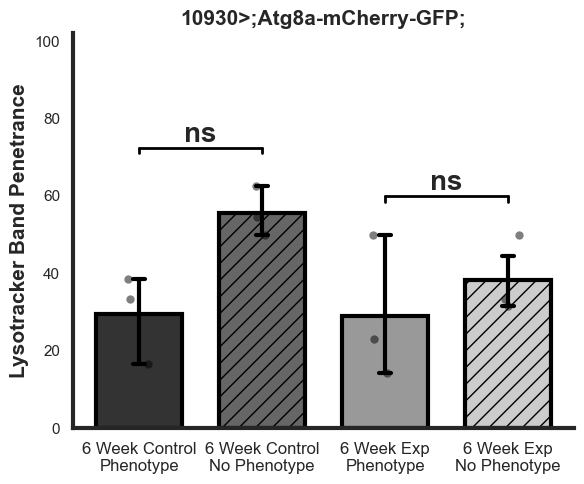

In [62]:
stats_path = "../../Results/ResultsFigure6/StatsLysoFas3CtrlvsExpByPhenoAtg8aGlmm.csv"
stats = pd.read_csv(stats_path)

fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Group",
    y="PerLysoByPheno",
    palette='gray',
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=df,
    x="Group",
    y="PerLysoByPheno",
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

for i, group in enumerate(unique_groups):
    if "No Phenotype" in group:
        barplot.patches[i].set_hatch("//")


bar_positions = [bar.get_x() + bar.get_width()/2 for bar in barplot.patches]

for _, row in stats.iterrows():
    genotype = row['Genotype']
    star = row['stars']

    genotype = genotype.replace('Control', '6wk_Control').replace('Exp', '6wk_Exp')

    group_bars = [i for i, g in enumerate(unique_groups) if g.startswith(genotype)]
    if not group_bars:
        continue

    x_mid = sum([bar_positions[i] for i in group_bars]) / len(group_bars)

    y_max = df[df["Group"].isin([unique_groups[i] for i in group_bars])]["PerLysoByPheno"].max()
    
    # Offset for star
    star_offset = 10
    ax.text(
        x=x_mid,
        y=y_max + star_offset,
        s=star,
        ha="center",
        va="bottom",
        fontsize=20,
        fontweight="bold"
    )

    bracket_offset = 0  
    y_bracket = y_max + star_offset - bracket_offset

    x1 = bar_positions[group_bars[0]]  
    x2 = bar_positions[group_bars[1]] 

    ax.plot([x1, x2], [y_bracket, y_bracket], color="black", linewidth=2)
    ax.plot([x1, x1], [y_bracket, y_bracket - 1.5], color="black", linewidth=2)
    ax.plot([x2, x2], [y_bracket, y_bracket - 1.5], color="black", linewidth=2)


ax.set_xticklabels([
    "6 Week Control\nPhenotype", 
    "6 Week Control\nNo Phenotype",
    "6 Week Exp\nPhenotype", 
    "6 Week Exp\nNo Phenotype"
], fontsize=12)

plt.ylim(0, 102)
plt.ylabel("Lysotracker Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")
plt.title('10930>;Atg8a-mCherry-GFP;', fontsize=15, weight='bold')

ax.tick_params(width=3)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Remove legend safely
leg = ax.get_legend()
if leg is not None:
    leg.remove()

plt.tight_layout()

results_directory = "../../Results/ResultsFigure6"
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, "LysoFas3CtrlvExpByPhenoAtg8amChGfp.pdf")
plt.savefig(filename, format="pdf", bbox_inches="tight")
plt.show()


Plotting phenotype penetrance in no Lysotracker band condition for 1 vs 6 weeks in ;10930;>;Atg8a-mCherry-GFP;

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [71]:
csv_path = "../../Data/DataFigure6/Atg8amChGfpNoLysoFas3PhenoPenCtrlvExp_n.csv"
df = pd.read_csv(csv_path)

In [72]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerNoBandPheno'] = df['NoLysoFas3_PhenoCtrlvsExp'] *100

In [73]:
df.head(7)

,Weeks,Genotype,NoLysoFas3_PhenoCtrlvsExp,n,N,PerNoBandPheno
0,6 Weeks,Control,0.7143,7,1,71.43
1,6 Weeks,Exp,0.3333,3,1,33.33
2,6 Weeks,Control,0.7273,11,2,72.73
3,6 Weeks,Exp,0.5806,31,2,58.06
4,6 Weeks,Control,0.5455,11,3,54.55
5,6 Weeks,Exp,0.3846,26,3,38.46


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_17231/3603204512.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


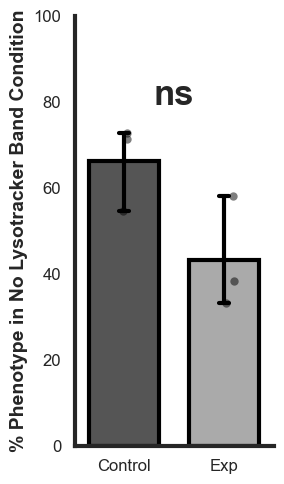

In [74]:
stats_path = "../../Results/ResultsFigure6/StatsPhenoNoLysoCtrlvExpttest.csv"
stats = pd.read_csv(stats_path)

star = stats.loc[0, "stars"]

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Genotype",
    y="PerNoBandPheno",
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Genotype",
    y="PerNoBandPheno",
    ax=ax,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True
)

bar_positions = [bar.get_x() + bar.get_width()/2 for bar in ax.patches]

x_mid = sum(bar_positions) / len(bar_positions)
y_max = df["PerNoBandPheno"].max()
offset = 5

ax.text(
    x=x_mid,
    y=y_max + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("% Phenotype in No Lysotracker Band Condition", fontsize=14, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

results_directory = "../../Results/ResultsFigure6"
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, "PhenoPenetranceNoLyso6wkCtrlvExp.pdf")
plt.savefig(filename, format="pdf", bbox_inches="tight")
plt.show()
